In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# DO NOT CHANGE THESE DATAFRAMES 
# CREATE COPIES
df_threats = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df_loss = pd.read_csv('LossFromNetCrime.csv')
df_world = pd.read_csv('world-data-2023.csv', index_col = 'Country')

# Section 3 - Combining

### Country Codes Hide Cell

In [70]:
country_codes = {
    "PR": "Puerto Rico", "PS": "Palestine", "PT": "Portugal", "PY": "Paraguay",
    "AE": "United Arab Emirates", "AF": "Afghanistan", "AL": "Albania", "AM": "Armenia",
    "AO": "Angola", "AR": "Argentina", "AT": "Austria", "AU": "Australia",
    "AZ": "Azerbaijan", "RO": "Romania", "BA": "Bosnia and Herzegovina", "RS": "Serbia",
    "BD": "Bangladesh", "RU": "Russia", "BE": "Belgium", "BG": "Bulgaria",
    "BH": "Bahrain", "SA": "Saudi Arabia", "BR": "Brazil", "SC": "Seychelles",
    "SE": "Sweden", "SG": "Singapore", "SI": "Slovenia", "BY": "Belarus",
    "SK": "Slovakia", "BZ": "Belize", "CA": "Canada", "SV": "El Salvador",
    "CH": "Switzerland", "SZ": "Eswatini", "CL": "Chile", "CN": "China",
    "CO": "Colombia", "CR": "Costa Rica", "TH": "Thailand", "CY": "Cyprus",
    "CZ": "Czech Republic", "TR": "Turkey", "DE": "Germany", "TW": "Taiwan",
    "TZ": "Tanzania", "DK": "Denmark", "DO": "Dominican Republic", "UA": "Ukraine",
    "UG": "Uganda", "US": "United States", "EC": "Ecuador", "EE": "Estonia",
    "EG": "Egypt", "UZ": "Uzbekistan", "ES": "Spain", "VE": "Venezuela",
    "VG": "British Virgin Islands", "VN": "Vietnam", "FI": "Finland", "FR": "France",
    "GB": "United Kingdom", "GE": "Georgia", "GH": "Ghana", "GN": "Guinea",
    "GR": "Greece", "GT": "Guatemala", "HK": "Hong Kong", "HN": "Honduras",
    "HR": "Croatia", "YE": "Yemen", "HU": "Hungary", "ID": "Indonesia",
    "IE": "Ireland", "IL": "Israel", "IN": "India", "ZA": "South Africa",
    "IQ": "Iraq", "IR": "Iran", "IS": "Iceland", "IT": "Italy",
    "ZW": "Zimbabwe", "JO": "Jordan", "JP": "Japan", "KE": "Kenya",
    "KG": "Kyrgyzstan", "KH": "Cambodia", "KN": "Saint Kitts and Nevis", "KR": "South Korea",
    "KZ": "Kazakhstan", "LB": "Lebanon", "LK": "Sri Lanka", "LT": "Lithuania",
    "LU": "Luxembourg", "LV": "Latvia", "LY": "Libya", "MD": "Moldova",
    "MM": "Myanmar", "MN": "Mongolia", "MT": "Malta", "MV": "Maldives",
    "MX": "Mexico", "MY": "Malaysia", "MZ": "Mozambique", "NG": "Nigeria",
    "NI": "Nicaragua", "NL": "Netherlands", "NO": "Norway", "NP": "Nepal",
    "NZ": "New Zealand", "OM": "Oman", "PA": "Panama", "PE": "Peru",
    "PG": "Papua New Guinea", "PH": "Philippines", "PK": "Pakistan", "PL": "Poland",
    'NaN': 'NaN'  # Represents missing or undefined country
}

### DataFrame - Trasform Country Codes to Country Names

In [71]:
# final output dataFrame for this cell = cntry_loss

cntry_loss = df_loss.copy() #copy df
cntry_loss = cntry_loss.rename(columns = {'Country' :'Country Code'}).sort_values(by = 'Country Code') # rename column and sort 
#print(cntry_loss.loc[103]) 
#print(cntry_loss.shape)
cntry_loss = cntry_loss.dropna() # delete the nan columns
#cntry_loss = cntry_loss.drop(axis = 0, index = 103) # delete the nan column
#print(cntry_loss.shape)

column = cntry_loss['Country Code'] # define column variable

# create empty lists
country_col = []
country_id = []
# create a 3 digit country ID 
value = 100 

for i in column: 
    #print(country_codes[i])
    # from list append 
    country_col.append(country_codes[i])
    value += 1
    country_id.append((value))

# create new columns
cntry_loss.insert(loc = 1, column = 'Country', value = country_col)
cntry_loss.insert(loc = 1, column = 'Country ID', value = country_id)
# set index = Country
cntry_loss = cntry_loss.set_index('Country').sort_index().copy()

# Copilot soln without the loop
# cntry_loss['Country'] = cntry_loss['Country Code'].map(country_codes)

### Join DataFrames

In [72]:
cntry_wrld

,Population,GDP
Country,,
Afghanistan,38041754.0,1.910135e+10
Albania,2854191.0,1.527808e+10
Algeria,43053054.0,1.699882e+11
Andorra,77142.0,3.154058e+09
Angola,31825295.0,9.463542e+10
...,...,...
Venezuela,28515829.0,4.823593e+11
Vietnam,96462106.0,2.619212e+11
Yemen,29161922.0,2.691440e+10


In [81]:
# final output dataFrame for this cell = df_join_23

# work with world data
cntry_wrld = df_world.sort_index()[['Population', 'GDP']].copy() # choose relevant cols
cntry_wrld = cntry_wrld.dropna() # delete the nan columns

# ~~~ make Population into type = float
list_pop = [] # list of population

for i in cntry_wrld['Population']: 
    i = i.replace(',', '') # delete chars
    list_pop.append(float(i)) # append float(population)

cntry_wrld['Population'] = list_pop

list_gdp = []

# ~~~ make GDP into type = float
for i in cntry_wrld['GDP']: 
    i = i.replace(',', '') # delete chars
    i = i.replace('$', '')
    list_gdp.append(float(i))

cntry_wrld['GDP'] = list_gdp

# WORLD data are from 2023
# df.join() is for joining the dfs by indeces 
df_join_23 = cntry_wrld.join(cntry_loss[['2023_Complaints', '2023_Losses']], lsuffix = '_l', how = 'inner')

In [82]:
df_join_23

,Population,GDP,2023_Complaints,2023_Losses
Country,,,,
Afghanistan,38041754.0,1.910135e+10,1150,38527355
Albania,2854191.0,1.527808e+10,2178,46707757
Angola,31825295.0,9.463542e+10,1336,15792180
Argentina,44938712.0,4.496634e+11,8511,372985785
Armenia,2957731.0,1.367280e+10,5041,114193013
...,...,...,...,...
Uzbekistan,33580650.0,5.792129e+10,1414,31812459
Venezuela,28515829.0,4.823593e+11,11897,306878450
Vietnam,96462106.0,2.619212e+11,51411,1166933394


### Correlations 

In [83]:
new_df = df_join_23[['2023_Complaints', 'Population']]
new_df.corr(numeric_only = True)

,2023_Complaints,Population
2023_Complaints,1.000000,0.534335
Population,0.534335,1.000000


In [85]:
new_df = df_join_23[['2023_Complaints', 'GDP']]
new_df.corr(numeric_only = True)

,2023_Complaints,GDP
2023_Complaints,1.000000,0.924679
GDP,0.924679,1.000000


## Start Plotting

In [89]:
arr_com = np.array(df_join_23.sort_values(by = '2023_Complaints')['2023_Complaints'])
arr_pop = np.array(df_join_23.sort_values(by ='2023_Complaints')['Population'])
arr_gdp = np.array(df_join_23.sort_values(by ='2023_Complaints')['GDP'])

In [103]:
# Removing Outliers 

# Create conditions 
cond_pop = np.where(arr_pop > 0.8*10**9)
cond_com = (np.where(arr_com > 30000))[0].tolist()
#cond = []

new_com = np.delete(arr_com,[ 99, 108] + cond_com)
new_pop = np.delete(arr_pop, [ 99, 108] + cond_com)
new_gdp = np.delete(arr_gdp, [ 99, 108] + cond_com)

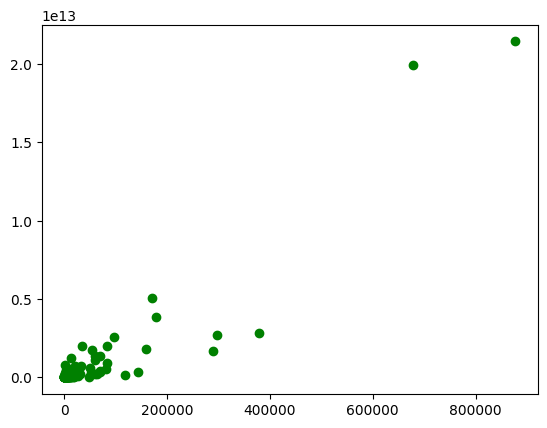

In [98]:
plt.plot(arr_com, arr_gdp, 'o', color = 'g')

line_x = np.array([new_com[0], new_com[-1]])
line_y =  np.array([new_gdp[0], new_gdp[-1]])

#plt.plot(line_x, line_y)
#plt.yscale('log')
#plt.xscale('log')

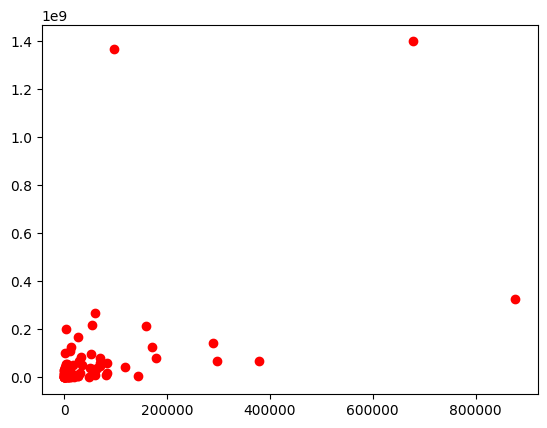

In [106]:
plt.plot(arr_com, arr_pop, 'o', color = 'r')

line_x = np.array([new_com[0], new_com[-1]])
line_y =  np.array([new_gdp[0], new_gdp[-1]])

#plt.plot(line_x, line_y)
#plt.yscale('log')
#plt.xscale('log')

In [104]:
np.corrcoef(new_com, new_gdp)

array([[1.        , 0.38828987],
       [0.38828987, 1.        ]])

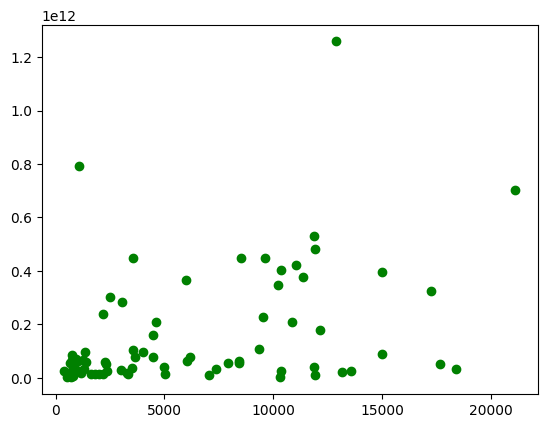

In [99]:
plt.plot(new_com, new_gdp, 'o', color = 'g')

line_x = np.array([new_com[0], new_com[-1]])
line_y =  np.array([new_gdp[0], new_gdp[-1]])

#plt.plot(line_x, line_y)
#plt.yscale('log')
#plt.xscale('log')